<img src='https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/tools/frameworks/-/raw/main/img/Standard_banner.png' align='right' width='100%'/>

<a href="../Index.ipynb"><< Index</a>
<br>
<a href="./1_6_P4_SSHA.ipynb"><< Poseidon-4 sea surface height anomalies</a>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href="./1_8_P4_WS.ipynb">Poseidon-4 wind speed >></a>

<font color="#138D75">**Copernicus Marine Training Service**</font> <br>
**Copyright:** 2022 EUMETSAT <br>
**License:** MIT

<div class="alert alert-block alert-success">
<h3>Learn Poseidon-4: Introductory</h3></div>

<div class="alert alert-block alert-warning">
    
<b>PREREQUISITES </b>
    
The following modules are prerequisites for this notebook:
- **<a href="1_1_P4_data_access_SFTP.ipynb" target="_blank">1_1_P4_data_access_SFTP</a>**; this will download the required Poseidon-4 products for this notebook.
</div>
<hr>


# 1.7 Poseidon-4 significant wave height 


### Data used

| Product Description  | Data Store collection ID| Product Navigator | 
|:--------------------:|:-----------------------:|:-------------:|
| Sentinel-6 Poseidon-4 Altimetry level-2 High Resolution (NTC) | EO:EUM:DAT:0128 | <a href="https://navigator.eumetsat.int/product/EO:EUM:DAT:0128?query=Altimetry%20NTC&filter=satellite__Sentinel-6&results=20&s=advanced" target="_blank">link</a> |

### Learning outcomes

At the end of this notebook you will know;
* Objective

### Outline

<div class="alert alert-info" role="alert">

## <a id='TOC_TOP'></a>Contents

</div>
    
 1. [Reading SRAL level-2 SWH data](#section1)

<hr>

In [1]:
# library imports
import cartopy
import cmocean
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import os
import warnings
import glob

warnings.filterwarnings('ignore')
plt.rcParams.update({'font.size': 12})

<div class="alert alert-info" role="alert">

## <a id='section1'></a>1. Reading Poseidon-4 level-2 SWH data
[Back to top](#TOC_TOP)

</div>

In [2]:
# selecting SAFE directories
SAFE_product = glob.glob(os.path.join(os.getcwd(), 'products','S6A_P4_2__HR*_NT_*','*.nc'))[0]

In [3]:
# read data
ds_01 = xr.open_dataset(SAFE_product, group="data_01")
ds_01_ku = xr.open_dataset(SAFE_product, group="data_01/ku")
ds_01.close()
ds_01_ku.close()

In [4]:
flags_swh = np.array(ds_01_ku.swh_ocean_qual).astype(float)
flags_sc = np.array(ds_01.surface_classification_flag).astype(float)
valid_vals = np.where((flags_swh == 0.0) & (flags_sc == 0.0))

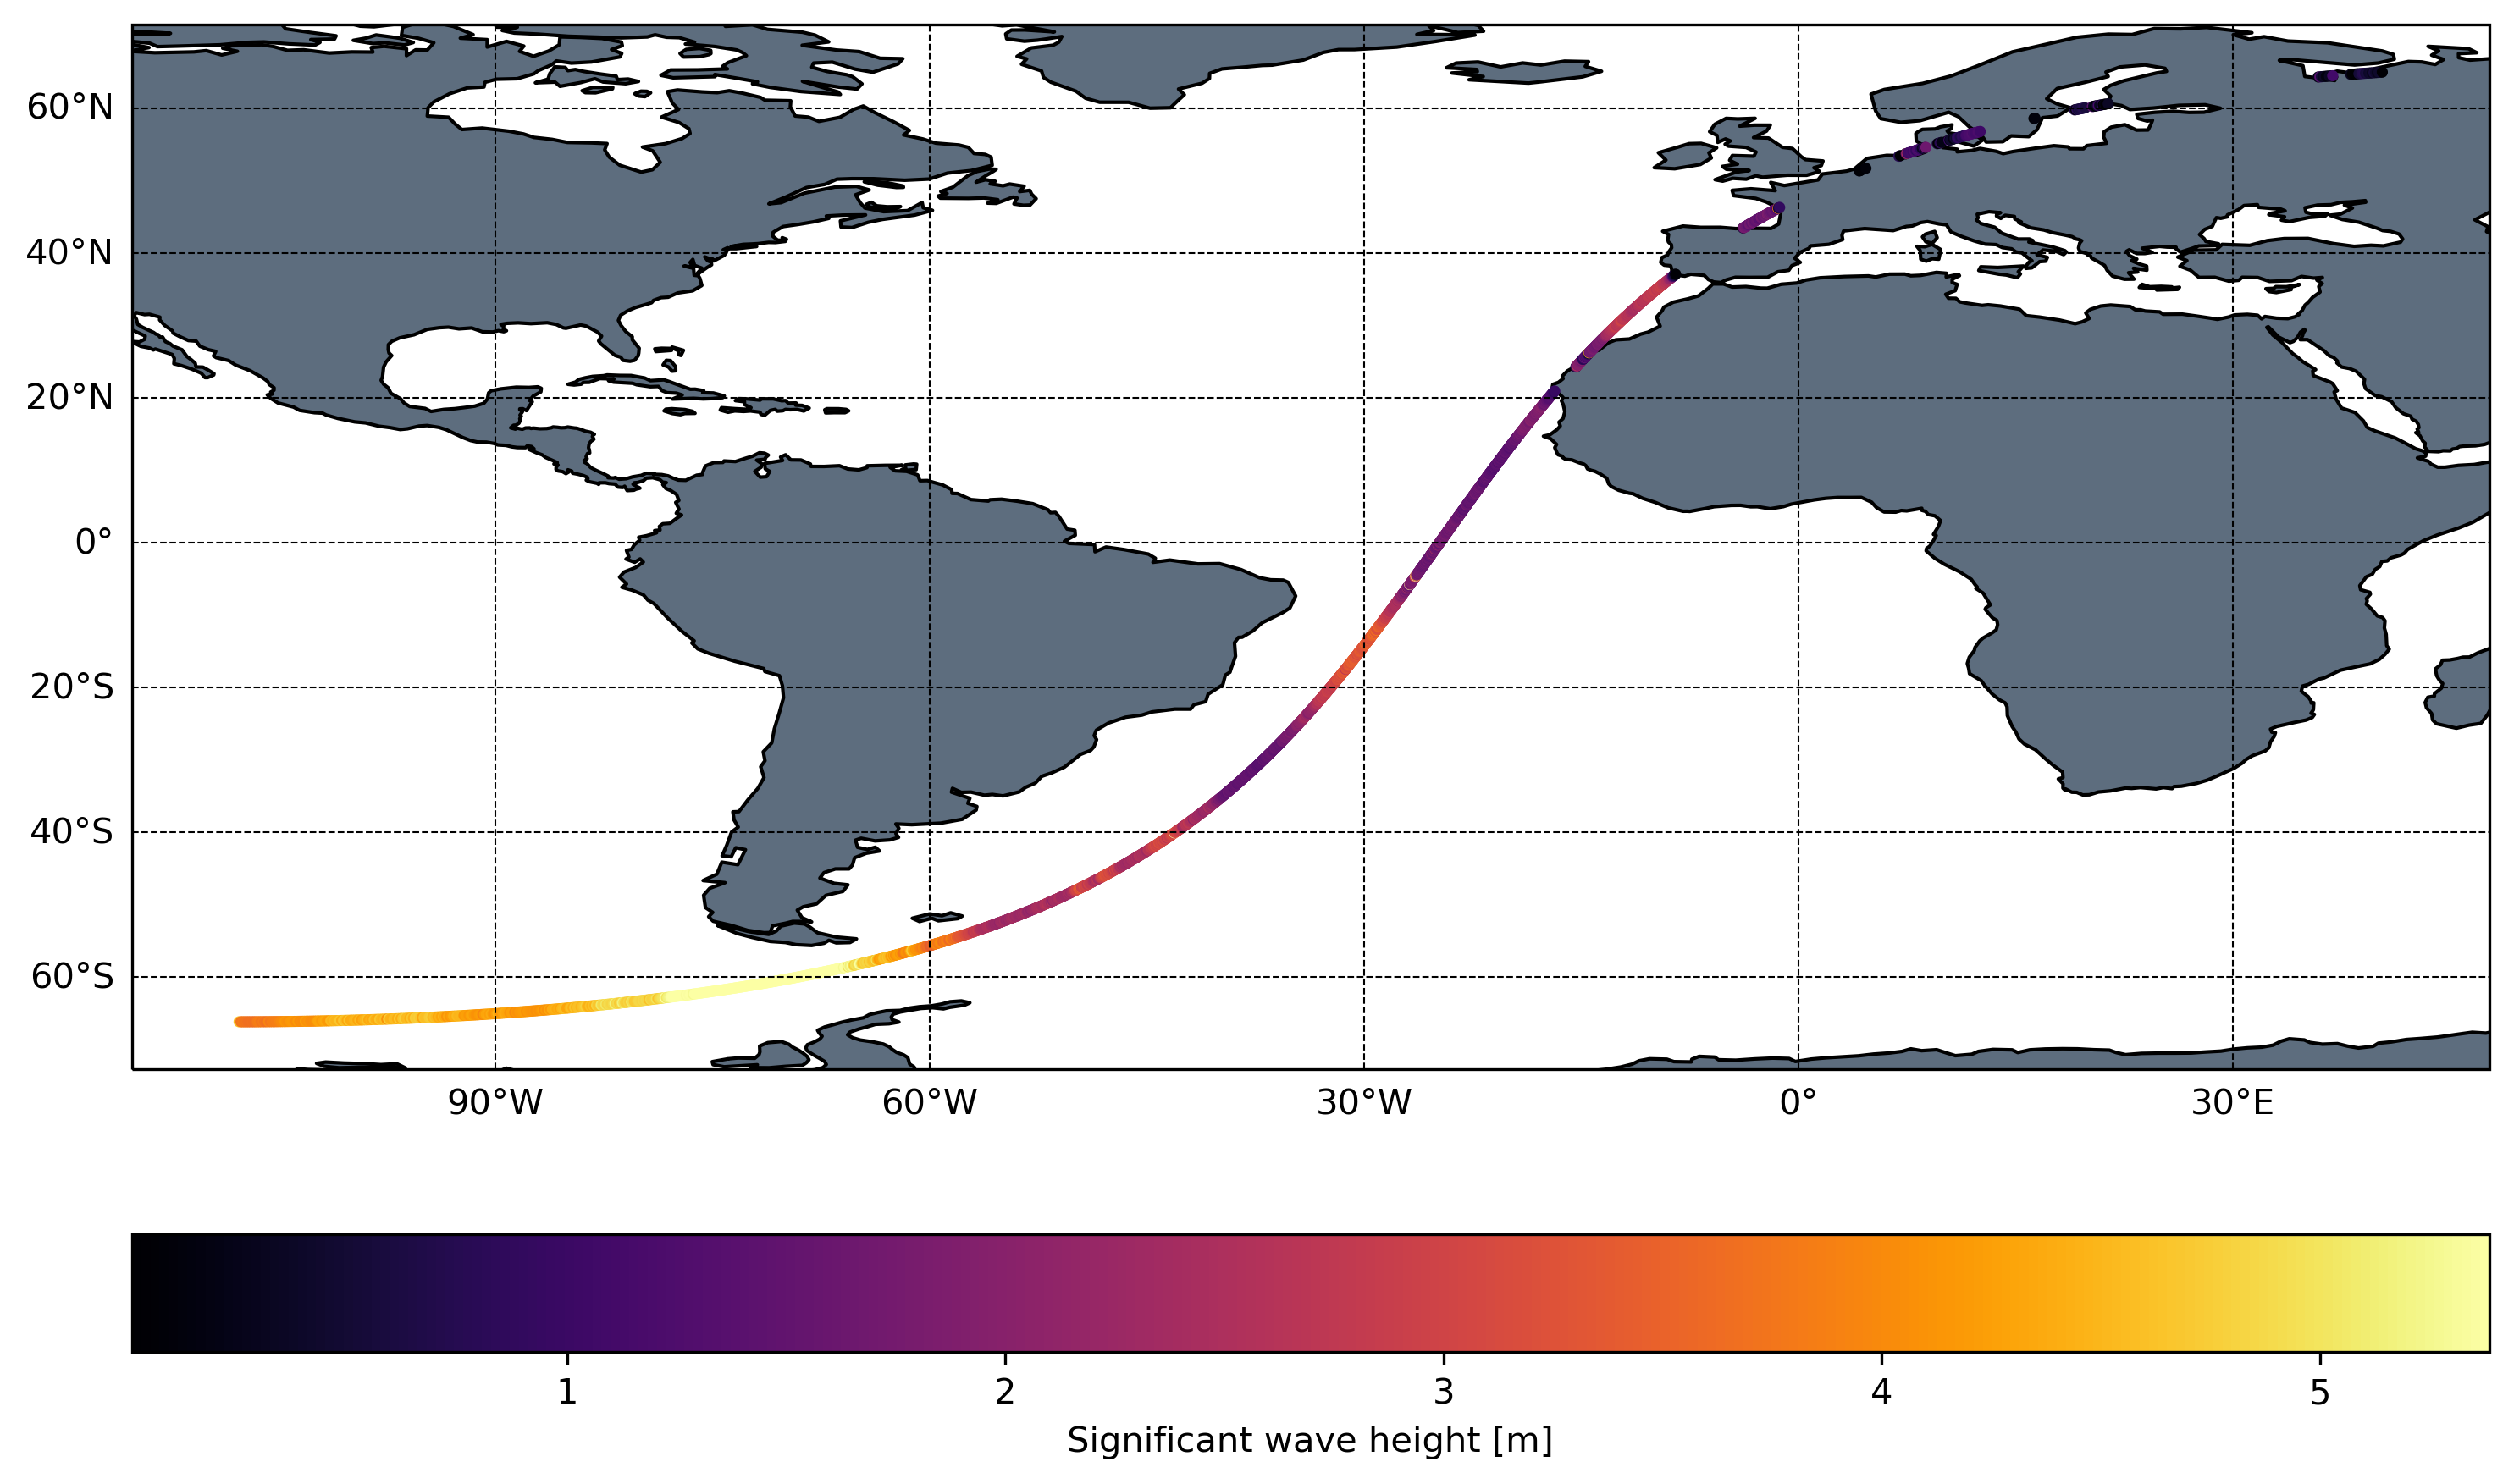

In [5]:
# plot the flagged track data for geophysical variables
fig, m = plt.subplots(1, 1, figsize=(10, 10), dpi=300, subplot_kw={"projection": cartopy.crs.PlateCarree()})

vmin = np.nanpercentile(ds_01_ku.swh_ocean, 5)
vmax = np.nanpercentile(ds_01_ku.swh_ocean, 95)
f1 = m.scatter(ds_01.longitude[valid_vals], ds_01.latitude[valid_vals], c=ds_01_ku.swh_ocean[valid_vals], s=10, cmap="inferno", marker='o', edgecolors=None, 
               linewidth=0.0, vmin=vmin, vmax=vmax)

m.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='k', facecolor='#5D6D7E')
g1 = m.gridlines(draw_labels = True, zorder=20, color='0.0', linestyle='--', linewidth=0.5)
g1.top_labels = False
g1.right_labels = False
g1.xlabel_style = {'color': 'black'}
g1.ylabel_style = {'color': 'black'}
m.set(facecolor = "1.0")
m.set_aspect(0.5)

cbar = plt.colorbar(f1, ax=m, orientation="horizontal", fraction=0.05, pad=0.07)
cbar.set_label('Significant wave height [m]')

plt.tight_layout()
plt.savefig('1_7_P4_SWH.png')

<hr>
<a href="../Index.ipynb"><< Index</a>
<br>
<a href="./1_6_P4_SSHA.ipynb"><< Poseidon-4 sea surface height anomalies</a>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href="./1_8_P4_WS.ipynb">Poseidon-4 wind speed >></a>
<hr>
<a href="https://gitlab.eumetsat.int/eumetlab/ocean">View on GitLab</a> | <a href="https://training.eumetsat.int/">EUMETSAT Training</a> | <a href=mailto:ops@eumetsat.int>Contact helpdesk for support </a> | <a href=mailto:Copernicus.training@eumetsat.int>Contact our training team to collaborate on and reuse this material</a></span></p>